## Análisis del Mercado de Airbnb en Santo Domingo Este.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols 
import statsmodels.api as sm

In [2]:
airbnb= pd.read_csv("airbnb1.csv",delimiter= ",")

In [3]:
airbnb.head(5)

,UID,Listing URL,Listing Title,Property Type,Arrangement Type,Longitude,Latitude,City,Currency Local,Bedrooms,...,Max_Guests,Overall_Rating,Pets_Allowed,Amenities,Security Deposit (USD),Created_Date,Number_of_Reviews,Number_of_Photos,Occupancy_Rate,Avg_price
0,10461821.0,https://www.airbnb.com/rooms/10461821,Modern and colorful condo,apartment,Entire Home,-69.84363,18.47209,NaN,NaN,2,...,5,90,Yes,"24 hour check in,air conditioning,bedroom esse...",NaN,2/15/2016,22,29,50%,26.222222
1,11378360.0,https://www.airbnb.com/rooms/11378360,B/b Paolo e Angelina,bed and breakfast,Private Room,-69.84184,18.49001,NaN,NaN,2,...,4,100,Yes,"24 hour check in,breakfast included,cable tv,d...",0.0,7/8/2016,3,18,0%,0.000000
2,17345815.0,https://www.airbnb.com/rooms/17345815,☀A Vibrant Waterfront Gated Residential Commun...,condo,Entire Home,-69.87977,18.47937,NaN,NaN,3,...,5,100,No,"24 hour check in,air conditioning,bedroom esse...",0.0,6/17/2019,71,37,83%,62.878788
3,17505139.0,https://www.airbnb.com/rooms/17505139,"Los Molinos, Apartamento 2do piso con terraza",apartment,Entire Home,-69.78842,18.46908,NaN,NaN,2,...,4,100,No,"air conditioning,bedroom essentials,cable tv,c...",0.0,2/28/2017,41,25,64%,30.363636
4,11493309.0,https://www.airbnb.com/rooms/11493309,Cheap condo with AC,condo,Entire Home,-69.8436,18.47216,NaN,NaN,2,...,5,90,Yes,"24 hour check in,air conditioning,bedroom esse...",NaN,7/8/2016,19,20,39%,22.560000


In [4]:
data=airbnb[['Bedrooms','Bathrooms','Max_Guests','Pets_Allowed','Amenities','Created_Date','Overall_Rating','Number_of_Reviews','Number_of_Photos','Occupancy_Rate','Avg_price']]

In [5]:
data.head(5)

,Bedrooms,Bathrooms,Max_Guests,Pets_Allowed,Amenities,Created_Date,Overall_Rating,Number_of_Reviews,Number_of_Photos,Occupancy_Rate,Avg_price
0,2,1,5,Yes,"24 hour check in,air conditioning,bedroom esse...",2/15/2016,90,22,29,50%,26.222222
1,2,2,4,Yes,"24 hour check in,breakfast included,cable tv,d...",7/8/2016,100,3,18,0%,0.000000
2,3,2,5,No,"24 hour check in,air conditioning,bedroom esse...",6/17/2019,100,71,37,83%,62.878788
3,2,2,4,No,"air conditioning,bedroom essentials,cable tv,c...",2/28/2017,100,41,25,64%,30.363636
4,2,1,5,Yes,"24 hour check in,air conditioning,bedroom esse...",7/8/2016,90,19,20,39%,22.560000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bedrooms           834 non-null    int64  
 1   Bathrooms          834 non-null    int64  
 2   Max_Guests         834 non-null    int64  
 3   Pets_Allowed       834 non-null    object 
 4   Amenities          833 non-null    object 
 5   Created_Date       834 non-null    object 
 6   Overall_Rating     834 non-null    int64  
 7   Number_of_Reviews  834 non-null    int64  
 8   Number_of_Photos   834 non-null    int64  
 9   Occupancy_Rate     834 non-null    object 
 10  Avg_price          834 non-null    float64
dtypes: float64(1), int64(6), object(4)
memory usage: 71.8+ KB


In [7]:
data.isnull().sum()

Bedrooms             0
Bathrooms            0
Max_Guests           0
Pets_Allowed         0
Amenities            1
Created_Date         0
Overall_Rating       0
Number_of_Reviews    0
Number_of_Photos     0
Occupancy_Rate       0
Avg_price            0
dtype: int64

In [8]:
data.dropna(axis=0, inplace=True)

<ipython-input-8-1edeb318a43a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, inplace=True)


In [9]:
from datetime import date
import datetime
import time

In [10]:
data['Created_Date']=pd.to_datetime(data['Created_Date'])

<ipython-input-10-b8d703b3e4a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Created_Date']=pd.to_datetime(data['Created_Date'])


In [11]:
today_date =datetime.date.today()

In [12]:
today_date =pd.to_datetime(today_date)

In [13]:
data['Days']=today_date-data['Created_Date']

<ipython-input-13-5b7e21cb0241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Days']=today_date-data['Created_Date']


In [14]:
data.head(5)

,Bedrooms,Bathrooms,Max_Guests,Pets_Allowed,Amenities,Created_Date,Overall_Rating,Number_of_Reviews,Number_of_Photos,Occupancy_Rate,Avg_price,Days
0,2,1,5,Yes,"24 hour check in,air conditioning,bedroom esse...",2016-02-15,90,22,29,50%,26.222222,2266 days
1,2,2,4,Yes,"24 hour check in,breakfast included,cable tv,d...",2016-07-08,100,3,18,0%,0.000000,2122 days
2,3,2,5,No,"24 hour check in,air conditioning,bedroom esse...",2019-06-17,100,71,37,83%,62.878788,1048 days
3,2,2,4,No,"air conditioning,bedroom essentials,cable tv,c...",2017-02-28,100,41,25,64%,30.363636,1887 days
4,2,1,5,Yes,"24 hour check in,air conditioning,bedroom esse...",2016-07-08,90,19,20,39%,22.560000,2122 days


In [15]:
data['Days']=days_int=(data["Days"] / np.timedelta64(1, 'D')).astype(int)

<ipython-input-15-f7c8600960c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Days']=days_int=(data["Days"] / np.timedelta64(1, 'D')).astype(int)


In [16]:
data['Occupancy_Rate']=data['Occupancy_Rate'].str.rstrip("%").astype('float')/100.0

<ipython-input-16-7a1a34964352>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Occupancy_Rate']=data['Occupancy_Rate'].str.rstrip("%").astype('float')/100.0


In [17]:
data['Pets_Allowed']=data['Pets_Allowed'].replace("Yes",1)
data['Pets_Allowed']=data['Pets_Allowed'].replace("No",0)

<ipython-input-17-2a0ea6206530>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pets_Allowed']=data['Pets_Allowed'].replace("Yes",1)
<ipython-input-17-2a0ea6206530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pets_Allowed']=data['Pets_Allowed'].replace("No",0)


In [18]:
data.drop('Created_Date',axis=1, inplace =True)

C:\Users\lui_s\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
data.head(5)

,Bedrooms,Bathrooms,Max_Guests,Pets_Allowed,Amenities,Overall_Rating,Number_of_Reviews,Number_of_Photos,Occupancy_Rate,Avg_price,Days
0,2,1,5,1,"24 hour check in,air conditioning,bedroom esse...",90,22,29,0.50,26.222222,2266
1,2,2,4,1,"24 hour check in,breakfast included,cable tv,d...",100,3,18,0.00,0.000000,2122
2,3,2,5,0,"24 hour check in,air conditioning,bedroom esse...",100,71,37,0.83,62.878788,1048
3,2,2,4,0,"air conditioning,bedroom essentials,cable tv,c...",100,41,25,0.64,30.363636,1887
4,2,1,5,1,"24 hour check in,air conditioning,bedroom esse...",90,19,20,0.39,22.560000,2122


In [20]:
data['Avg_nights']=data.Occupancy_Rate*(30)

<ipython-input-20-09b35ac57deb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Avg_nights']=data.Occupancy_Rate*(30)


In [21]:
data.head(5)

,Bedrooms,Bathrooms,Max_Guests,Pets_Allowed,Amenities,Overall_Rating,Number_of_Reviews,Number_of_Photos,Occupancy_Rate,Avg_price,Days,Avg_nights
0,2,1,5,1,"24 hour check in,air conditioning,bedroom esse...",90,22,29,0.50,26.222222,2266,15.0
1,2,2,4,1,"24 hour check in,breakfast included,cable tv,d...",100,3,18,0.00,0.000000,2122,0.0
2,3,2,5,0,"24 hour check in,air conditioning,bedroom esse...",100,71,37,0.83,62.878788,1048,24.9
3,2,2,4,0,"air conditioning,bedroom essentials,cable tv,c...",100,41,25,0.64,30.363636,1887,19.2
4,2,1,5,1,"24 hour check in,air conditioning,bedroom esse...",90,19,20,0.39,22.560000,2122,11.7


In [22]:
data['Avg_nights']=data['Avg_nights'].astype("int64")

<ipython-input-22-9ac1dc683dc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Avg_nights']=data['Avg_nights'].astype("int64")


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 833
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bedrooms           833 non-null    int64  
 1   Bathrooms          833 non-null    int64  
 2   Max_Guests         833 non-null    int64  
 3   Pets_Allowed       833 non-null    int64  
 4   Amenities          833 non-null    object 
 5   Overall_Rating     833 non-null    int64  
 6   Number_of_Reviews  833 non-null    int64  
 7   Number_of_Photos   833 non-null    int64  
 8   Occupancy_Rate     833 non-null    float64
 9   Avg_price          833 non-null    float64
 10  Days               833 non-null    int32  
 11  Avg_nights         833 non-null    int64  
dtypes: float64(2), int32(1), int64(8), object(1)
memory usage: 81.3+ KB


In [24]:
data['Avg_income']=data['Avg_price']*data['Avg_nights']

<ipython-input-24-9c2ee41cc789>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Avg_income']=data['Avg_price']*data['Avg_nights']


In [26]:
data.head(5)

,Bedrooms,Bathrooms,Max_Guests,Pets_Allowed,Amenities,Overall_Rating,Number_of_Reviews,Number_of_Photos,Occupancy_Rate,Avg_price,Days,Avg_nights,Avg_income
0,2,1,5,1,"24 hour check in,air conditioning,bedroom esse...",90,22,29,0.50,26.222222,2266,15,393.33
1,2,2,4,1,"24 hour check in,breakfast included,cable tv,d...",100,3,18,0.00,0.000000,2122,0,0.00
2,3,2,5,0,"24 hour check in,air conditioning,bedroom esse...",100,71,37,0.83,62.878788,1048,24,1509.09
3,2,2,4,0,"air conditioning,bedroom essentials,cable tv,c...",100,41,25,0.64,30.363636,1887,19,576.91
4,2,1,5,1,"24 hour check in,air conditioning,bedroom esse...",90,19,20,0.39,22.560000,2122,11,248.16


In [25]:
data['Avg_income']=round(data["Avg_income"],ndigits=2)

<ipython-input-25-f0158101bac7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Avg_income']=round(data["Avg_income"],ndigits=2)


In [28]:
data['Amenities']=data['Amenities'].str.count(',')+1

<ipython-input-28-f832208b27de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amenities']=data['Amenities'].str.count(',')+1


In [29]:
data.head(5)

,Bedrooms,Bathrooms,Max_Guests,Pets_Allowed,Amenities,Overall_Rating,Number_of_Reviews,Number_of_Photos,Occupancy_Rate,Avg_price,Days,Avg_nights,Avg_income
0,2,1,5,1,25,90,22,29,0.50,26.222222,2266,15,393.33
1,2,2,4,1,13,100,3,18,0.00,0.000000,2122,0,0.00
2,3,2,5,0,32,100,71,37,0.83,62.878788,1048,24,1509.09
3,2,2,4,0,31,100,41,25,0.64,30.363636,1887,19,576.91
4,2,1,5,1,24,90,19,20,0.39,22.560000,2122,11,248.16


## Análisis exploratorio de los datos.


<h4> Ingreso promedio del mercado de Airbnb Stgo Dgo Este.

In [31]:
round(data['Avg_income'].mean(),ndigits=2)

700.81

<h4> Tasa de ocupación promedio del mercado de Airbnb Stgo Dgo Este.

In [44]:
print("{0:.0%}".format(round(data['Occupancy_Rate'].mean(),ndigits=2)))

42%


<h4> Promedio de noches rentadas.

In [71]:
round(data['Avg_nights'].mean())

12

<h4> ¿Hace cuanto tiempo se creó el mercado de airbnb stgo este?

In [66]:
print(int(data['Days'].max()/365), "años de creación del mercado.")

7 años de creación del mercado.


In [76]:
round(data.describe(),ndigits=2)

,Bedrooms,Bathrooms,Max_Guests,Pets_Allowed,Amenities,Overall_Rating,Number_of_Reviews,Number_of_Photos,Occupancy_Rate,Avg_price,Days,Avg_nights,Avg_income
count,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00,833.00
mean,2.34,2.06,4.85,0.27,25.19,94.51,18.81,27.30,0.42,58.97,570.93,12.08,700.81
std,0.95,0.99,2.06,0.45,7.23,7.77,24.21,15.29,0.24,47.96,484.15,7.14,603.26
min,0.00,0.00,1.00,0.00,5.00,50.00,3.00,1.00,0.00,0.00,41.00,0.00,0.00
25%,2.00,1.00,4.00,0.00,21.00,90.00,5.00,16.00,0.22,35.67,220.00,6.00,287.00
50%,2.00,2.00,5.00,0.00,25.00,100.00,10.00,24.00,0.43,51.03,409.00,12.00,579.00
75%,3.00,2.00,6.00,1.00,30.00,100.00,22.00,35.00,0.60,69.00,817.00,18.00,977.44
max,10.00,9.00,16.00,1.00,48.00,100.00,219.00,100.00,1.00,786.33,2687.00,30.00,5436.67


<h4> Heatmap - Correclaciones de varibales.

In [67]:
corr =data.corr()
corr.shape

(13, 13)

<AxesSubplot:>

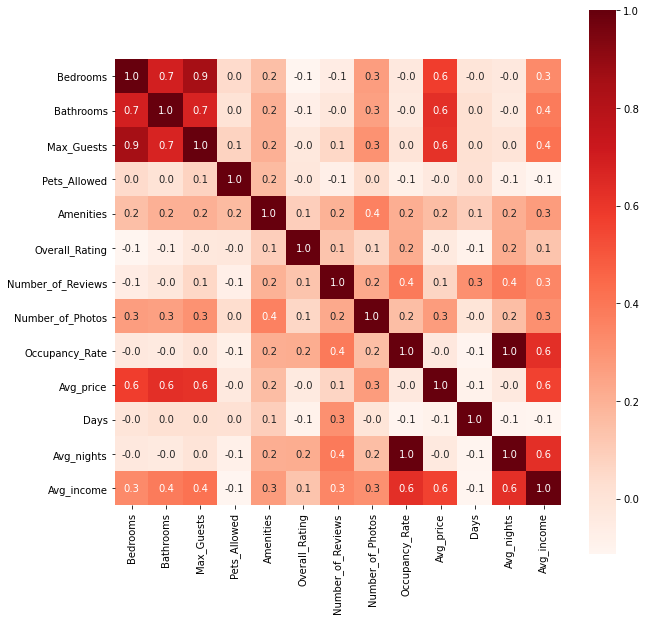

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Reds')


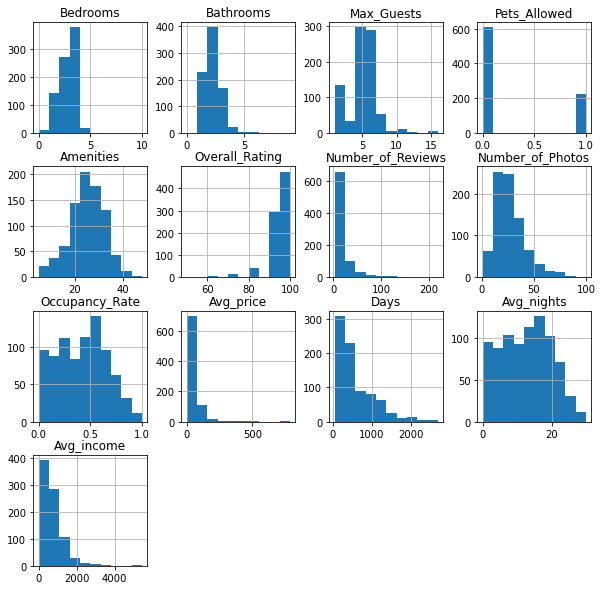

In [69]:
data.hist(figsize =(10,10))
plt.show()

In [77]:
print(data.columns)

Index(['Bedrooms', 'Bathrooms', 'Max_Guests', 'Pets_Allowed', 'Amenities',
       'Overall_Rating', 'Number_of_Reviews', 'Number_of_Photos',
       'Occupancy_Rate', 'Avg_price', 'Days', 'Avg_nights', 'Avg_income'],
      dtype='object')


## Modelo de regresión lineal

In [115]:
# Usaremos como variable dependiente los ingresos primedios ( Avg_income)

model= ols(formula='Avg_income~Bedrooms+Bathrooms+Max_Guests+Pets_Allowed+Amenities+Overall_Rating+Number_of_Reviews+Number_of_Photos+Occupancy_Rate+Avg_price+Days+Avg_nights',data=data)

                    
train=model.fit()

In [82]:
#Coeficientes
train.params

Intercept            -479.090202
Bedrooms              -69.746667
Bathrooms              41.418979
Max_Guests             42.443212
Pets_Allowed          -77.205310
Amenities               2.626230
Overall_Rating          0.148815
Number_of_Reviews       1.469339
Number_of_Photos        1.210232
Occupancy_Rate      -1642.302316
Avg_price               6.186927
Days                   -0.040356
Avg_nights            105.587650
dtype: float64

In [84]:
#Resumen
print(train.summary())

                            OLS Regression Results                            
Dep. Variable:             Avg_income   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     207.9
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          4.69e-239
Time:                        18:31:35   Log-Likelihood:                -5932.9
No. Observations:                 833   AIC:                         1.189e+04
Df Residuals:                     820   BIC:                         1.195e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -479.0902    140.29

In [86]:
# Modelo 2

model2= ols(formula='Avg_income~Bedrooms+Bathrooms+Max_Guests+Pets_Allowed+Number_of_Reviews+Avg_price',data=data)

                    
train2=model2.fit()

In [87]:
#Coeficientes 2
train2.params

Intercept             82.710188
Bedrooms             -48.645991
Bathrooms             37.584829
Max_Guests            43.440727
Pets_Allowed        -115.868300
Number_of_Reviews      7.433832
Avg_price              5.689614
dtype: float64

In [88]:
#Resumen
print(train2.summary())

                            OLS Regression Results                            
Dep. Variable:             Avg_income   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           2.91e-96
Time:                        18:38:27   Log-Likelihood:                -6283.0
No. Observations:                 833   AIC:                         1.258e+04
Df Residuals:                     826   BIC:                         1.261e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            82.7102     47.29

In [97]:
# Modelo 3

model3= ols(formula='Avg_income~Bedrooms+Max_Guests+Pets_Allowed+Number_of_Reviews+Avg_price',data=data)

                    
train3=model3.fit()

In [98]:
#Coeficientes 2
train3.params

Intercept             98.438269
Bedrooms             -34.191561
Max_Guests            46.435763
Pets_Allowed        -116.709865
Number_of_Reviews      7.382984
Avg_price              5.936257
dtype: float64

In [99]:
#Resumen
print(train3.summary())

                            OLS Regression Results                            
Dep. Variable:             Avg_income   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     122.2
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           8.14e-97
Time:                        18:44:25   Log-Likelihood:                -6284.2
No. Observations:                 833   AIC:                         1.258e+04
Df Residuals:                     827   BIC:                         1.261e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            98.4383     46.22

In [101]:
predictions=train3.predict(data[["Bedrooms","Max_Guests","Pets_Allowed","Number_of_Reviews","Avg_price"]])
print(predictions)

0       463.611599
1       121.237285
2      1125.498923
3       698.746899
4       419.722754
          ...     
829     629.707407
830     743.861669
831      62.557321
832     162.363360
833     382.538365
Length: 833, dtype: float64


In [102]:
# Predición del modelo

data['Prediction']=predictions

<ipython-input-102-55cbb3ccbf32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction']=predictions


In [108]:
data.head(5)

,Bedrooms,Bathrooms,Max_Guests,Pets_Allowed,Amenities,Overall_Rating,Number_of_Reviews,Number_of_Photos,Occupancy_Rate,Avg_price,Days,Avg_nights,Avg_income,Prediction
0,2,1,5,1,25,90,22,29,0.50,26.222222,2266,15,393.33,463.61
1,2,2,4,1,13,100,3,18,0.00,0.000000,2122,0,0.00,121.24
2,3,2,5,0,32,100,71,37,0.83,62.878788,1048,24,1509.09,1125.50
3,2,2,4,0,31,100,41,25,0.64,30.363636,1887,19,576.91,698.75
4,2,1,5,1,24,90,19,20,0.39,22.560000,2122,11,248.16,419.72


In [107]:
data['Prediction']=round(data["Prediction"],ndigits=2)

<ipython-input-107-312a8b764236>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prediction']=round(data["Prediction"],ndigits=2)


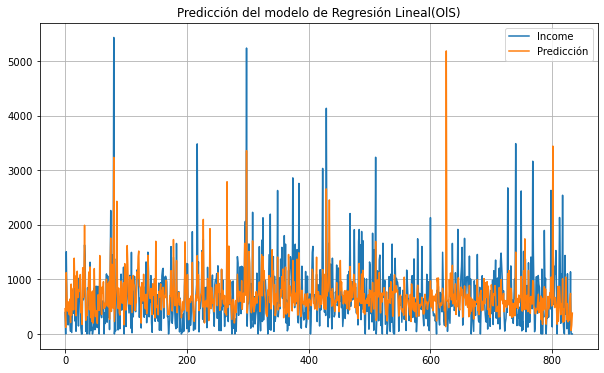

In [114]:
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
plt.plot(data.Avg_income)
plt.plot(data.Prediction)
plt.title("Predicción del modelo de Regresión Lineal(OlS)")
plt.legend(['Income','Predicción'])
plt.grid(True)
plt.show()

<h4> Correlación del número de habitaciones y el ingreso promedio.

C:\Users\lui_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bedrooms', ylabel='Avg_income'>

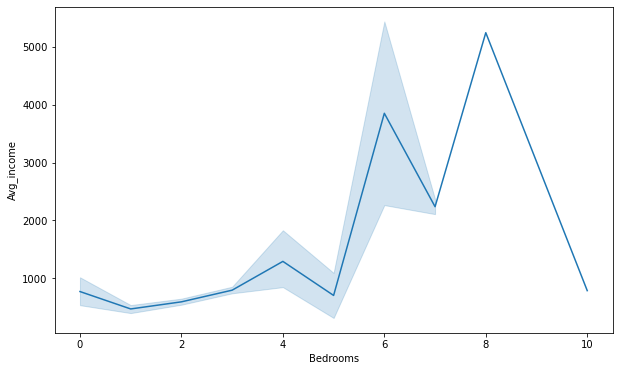

In [113]:
sns.lineplot('Bedrooms','Avg_income', data=data)